In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = load_digits()
X = data.data                         
y = data.target                      
class_names = data.target_names  

df = pd.DataFrame(X, columns=data.feature_names)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
modelo = GaussianNB()              
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro", zero_division=0)
recall = recall_score(y_test, y_pred, average="macro", zero_division=0)
f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)

print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1: {f1:.3f}\n")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy : 0.811
Precision: 0.846
Recall: 0.810
F1: 0.814

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        36
           1       0.69      0.81      0.74        36
           2       0.83      0.54      0.66        35
           3       1.00      0.70      0.83        37
           4       0.96      0.72      0.83        36
           5       0.95      0.95      0.95        37
           6       0.95      0.97      0.96        36
           7       0.73      0.97      0.83        36
           8       0.50      0.83      0.62        35
           9       0.86      0.69      0.77        36

    accuracy                           0.81       360
   macro avg       0.85      0.81      0.81       360
weighted avg       0.85      0.81      0.82       360



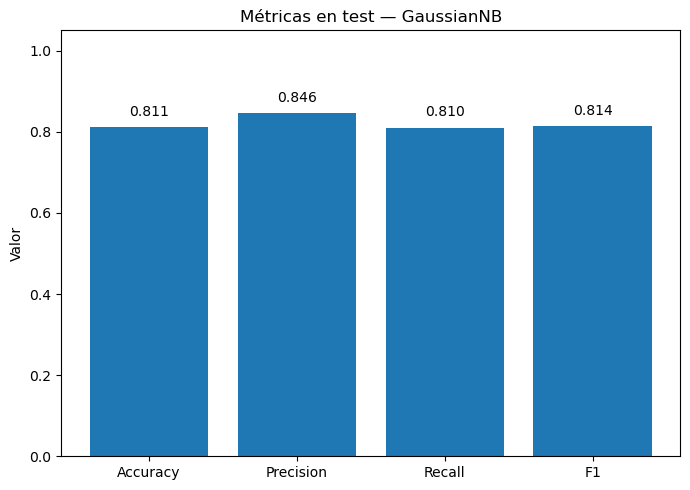

In [5]:

metric_names = ["Accuracy", "Precision", "Recall", "F1"]
metric_vals  = [accuracy, precision, recall, f1]

plt.figure(figsize=(7,5))
bars = plt.bar(metric_names, metric_vals)
plt.ylim(0, 1.05)
plt.title("Métricas en test — GaussianNB")
plt.ylabel("Valor")
for rect, val in zip(bars, metric_vals):
    h = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, h + 0.02, f"{val:.3f}",
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

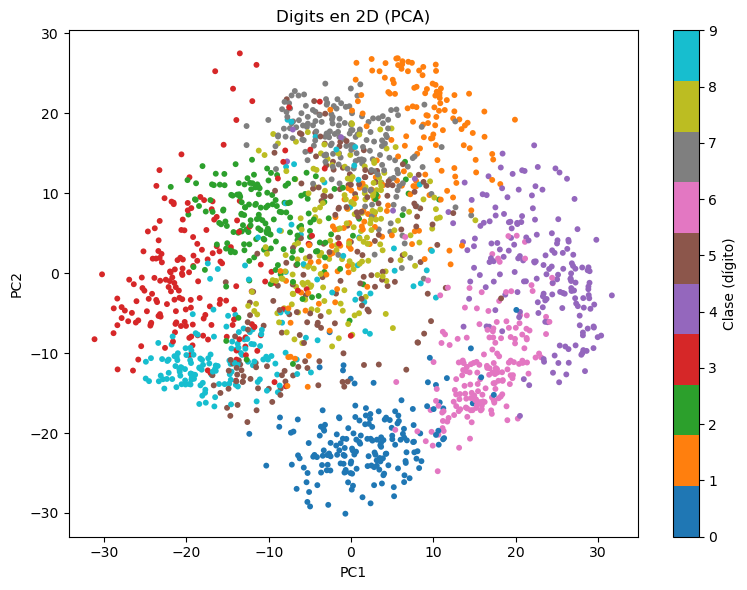

In [6]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="tab10", s=18, edgecolor="none")
plt.title("Digits en 2D (PCA)")
plt.xlabel("PC1"); plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label("Clase (dígito)")
plt.tight_layout()
plt.show()

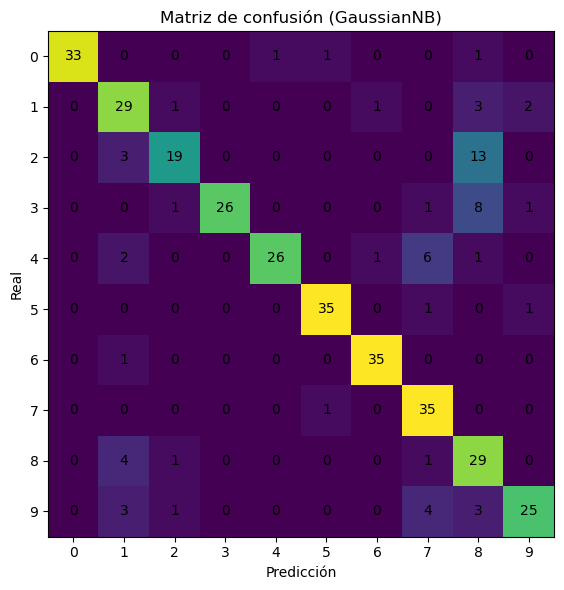

In [7]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,6))
plt.imshow(cm)
plt.title("Matriz de confusión (GaussianNB)")
plt.xticks(ticks=range(10), labels=range(10))
plt.yticks(ticks=range(10), labels=range(10))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

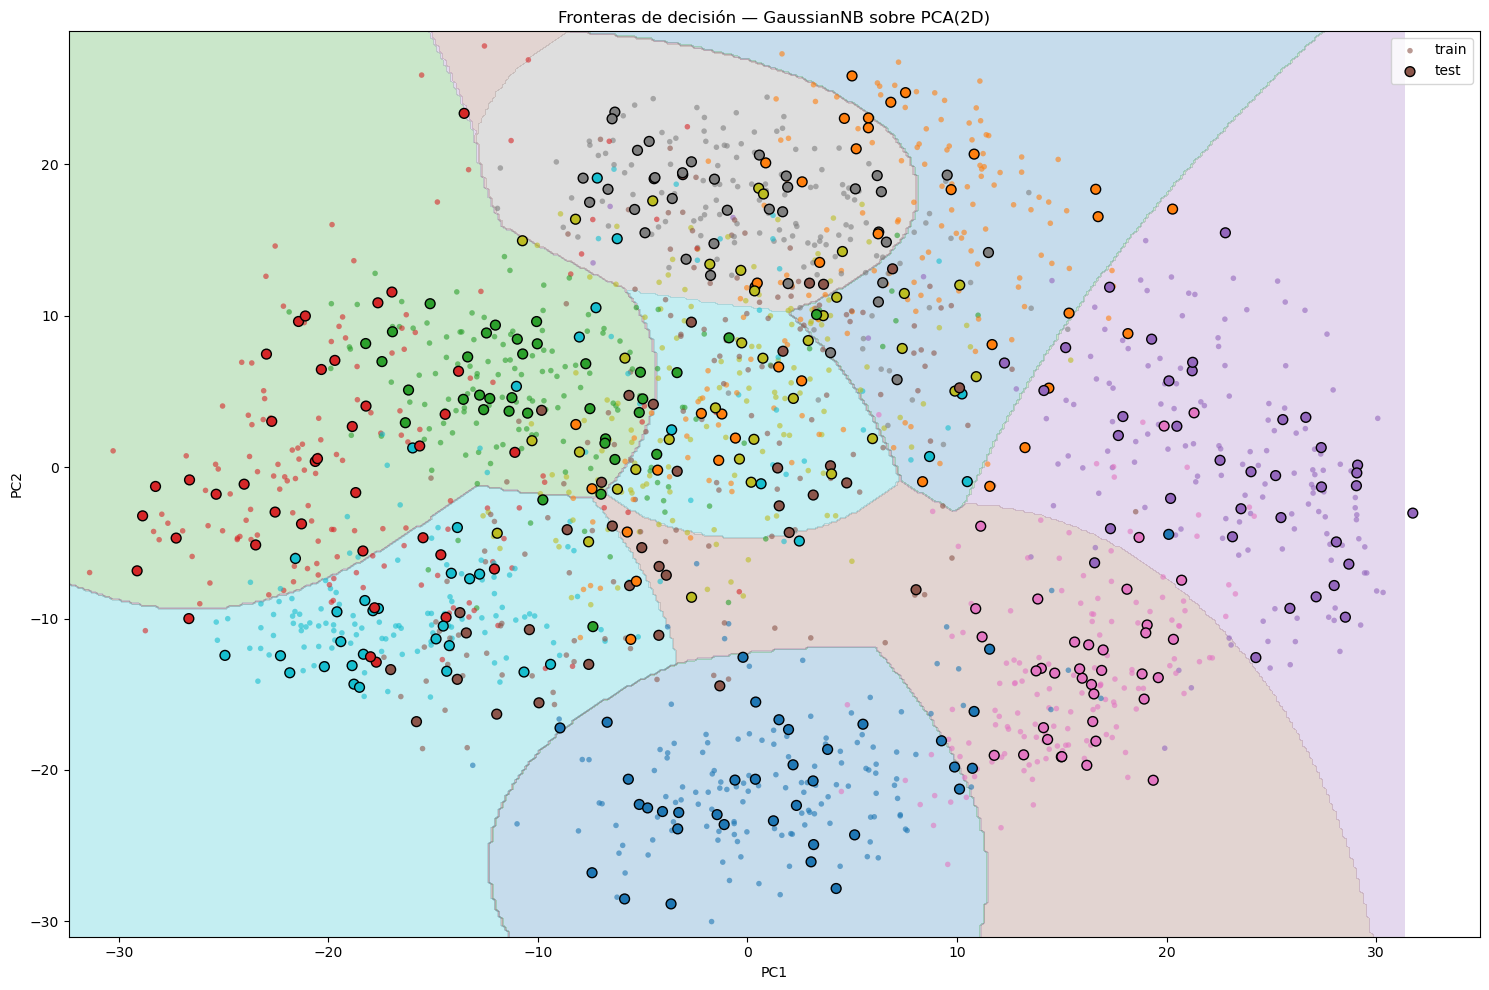

In [9]:
pca2 = PCA(n_components=2, random_state=42)
X_train_pca = pca2.fit_transform(X_train)
X_test_pca  = pca2.transform(X_test)

modelo2d = GaussianNB()              
modelo2d.fit(X_train_pca, y_train)

# Crear malla en el espacio PCA
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400)
)

# Predecir sobre la malla PCA
Z = modelo2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Visualización
plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, Z, alpha=0.25, cmap="tab10")
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="tab10",
            s=16, edgecolor="none", alpha=0.6, label="train")
plt.scatter(X_test_pca[:, 0],  X_test_pca[:, 1],  c=y_test,  cmap="tab10",
            s=50, edgecolor="k", label="test")
plt.title("Fronteras de decisión — GaussianNB sobre PCA(2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()